In [1]:
#data courtesy of MNIST: http://yann.lecun.com/exdb/mnist/
import pandas as pd
import struct
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
import tensorflow as tf

In [2]:
#see: https://stackoverflow.com/questions/39969045/parsing-yann-lecuns-mnist-idx-file-format
#loading the training data/input
with open("train-images.idx3-ubyte", "rb") as f:
    magic, size = struct.unpack(">II", f.read(8))
    nrows, ncols = struct.unpack(">II", f.read(8))
    train_data = np.fromfile(f, dtype=np.dtype(np.uint8).newbyteorder('>'))
    train_data = train_data.reshape((size, nrows, ncols))

train_data.shape


(60000, 28, 28)

In [3]:
#loading the target labels
with open("train-labels.idx1-ubyte", "rb") as f:
    magic, size = struct.unpack(">II", f.read(8))
    train_label = np.fromfile(f, dtype=np.dtype(np.uint8).newbyteorder('>'))
    #train_label = train_label.reshape((size, 28, 28))
train_label.shape    

(60000,)

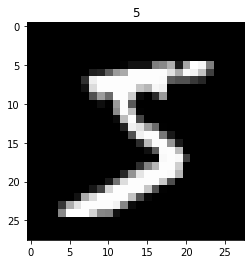

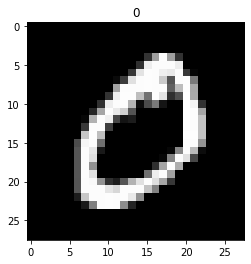

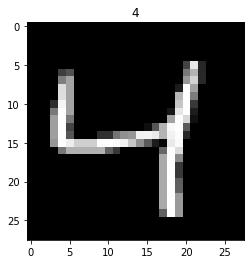

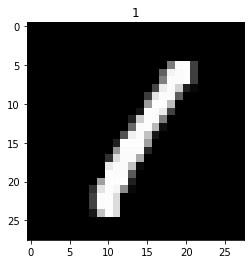

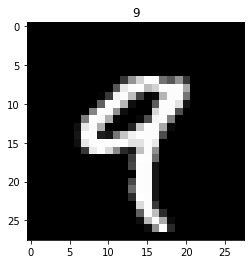

In [4]:
#reshape the 3D matrix to a format that can be used by numpy and tensorflow
#the images are of size 28x28 pixels
#28*28 = 784
train_data = train_data.reshape(train_data.shape[0], 784)

for i in range(5):
    plt.imshow(train_data[i,:].reshape(28,28), cmap="gray")
    plt.title(train_label[i])
    plt.show()


In [5]:
#output layer uses linear activation because softmax activation's numerical stability is
#lower compared to that of linear activation + softmax function
model =  Sequential(
    [
        tf.keras.Input(shape=(784,)),
        Dense(100,activation="relu"),
        Dense(50,activation="relu"),
        Dense(25,activation="relu"),
        Dense(10,activation="linear"),
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 50)                5050      
                                                                 
 dense_2 (Dense)             (None, 25)                1275      
                                                                 
 dense_3 (Dense)             (None, 10)                260       
                                                                 
Total params: 85,085
Trainable params: 85,085
Non-trainable params: 0
_________________________________________________________________


In [6]:
model.compile(
    loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer= tf.keras.optimizers.Adam(0.0003)
)

model.fit(train_data, train_label, epochs=85)

Epoch 1/85
1875/1875 [==============================] - 3s 1ms/step - loss: 2.1930
Epoch 2/85
1875/1875 [==============================] - 3s 1ms/step - loss: 0.7400
Epoch 3/85
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4868
Epoch 4/85
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3523
Epoch 5/85
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2587
Epoch 6/85
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1881
Epoch 7/85
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1450
Epoch 8/85
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1170
Epoch 9/85
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0979
Epoch 10/85
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0847
Epoch 11/85
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0717
Epoch 12/85
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0659
E

In [7]:
with open("t10k-images.idx3-ubyte", "rb") as f:
    magic, size = struct.unpack(">II", f.read(8))
    nrows, ncols = struct.unpack(">II", f.read(8))
    test_data = np.fromfile(f, dtype=np.dtype(np.uint8).newbyteorder('>'))
    test_data = test_data.reshape((size, 28, 28))
    
test_data = test_data.reshape(test_data.shape[0], 784)
test_data.shape

(10000, 784)

In [8]:
with open("t10k-labels.idx1-ubyte", "rb") as f:
    magic, size = struct.unpack(">II", f.read(8))
    test_label = np.fromfile(f, dtype=np.dtype(np.uint8).newbyteorder('>'))
    #train_data = train_data.reshape((size, nrows, ncols))

test_label.shape   

(10000,)

In [9]:
test_data, cv_data, test_label, cv_label = train_test_split(test_data, test_label, train_size=0.25)

print(f"Test sets and CV set shape:{test_data.shape, cv_data.shape}")

Test sets and CV set shape:((2500, 784), (7500, 784))


In [10]:
predictions = tf.nn.softmax(model.predict(cv_data)).numpy()

c = 0
m = cv_data.shape[0]

for i in range(m):
    if(np.argmax(predictions[i])!=cv_label[i]):
        c = c + 1
        #print(f"prediction and label:{np.argmax(predictions[i]), cv_label[i]}")

print(f"Cross validation set error rate: {c/m}")

235/235 [==============================] - 0s 949us/step
Cross validation set error rate: 0.026933333333333333


In [11]:
test_pred = tf.nn.softmax(model.predict(test_data)).numpy()

c = 0
m = test_data.shape[0]

for i in range(m):
    if(np.argmax(test_pred[i])!=test_label[i]):
        c = c + 1
        #print(f"prediction and label:{np.argmax(test_pred[i]), test_label[i]}")

print(f"Test set error rate: {c/m}")

79/79 [==============================] - 0s 1ms/step
Test set error rate: 0.026
